In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Raw Data

In [3]:
#data = pd.read_csv('./data/2013.csv')

In [4]:
#data.head(1)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,RPA,Latitude,Longitude,Mapped Location
0,PD201300000001,01/01/2013 12:00:00 AM,20130000003,C,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,0,11TH AV N / CHARLOTTE AV,410C,C,11.0,4205,36.162,-86.791,"(36.162, -86.791)"


## Formatting

In [5]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [6]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211710 entries, 0 to 1211709
Data columns (total 19 columns):
Event Number                  1211710 non-null object
Call Received                 1211710 non-null datetime64[ns]
Complaint Number              1211710 non-null int64
Shift                         1157006 non-null object
Tencode                       1211710 non-null int64
Tencode Description           1211710 non-null object
Tencode Suffix                551512 non-null object
Tencode Suffix Description    535229 non-null object
Disposition Code              1211710 non-null int64
Disposition Description       1205984 non-null object
Block                         1211710 non-null int64
Street Name                   1211695 non-null object
Unit Dispatched               1154067 non-null object
Sector                        1196149 non-null object
Zone                          1196149 non-null float64
RPA                           1211710 non-null int64
Latitude             

In [17]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitiude':'long','Mapped Location':'map_loc'}, axis=1)

In [19]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [22]:
#to avoid having to recreate and reload info
#df_13 = data.to_csv('./data/df_2013_formatted.csv', index = False)

## Load Formatted Data

In [85]:
df_13 = pd.read_csv('./data/df_2013_formatted.csv')

## Stats

In [77]:
data['Tencode Description'].value_counts()

KeyError: 'Tencode Description'

## Worst Days & Weeks

Text(0, 0.5, 'Number of Incidents')

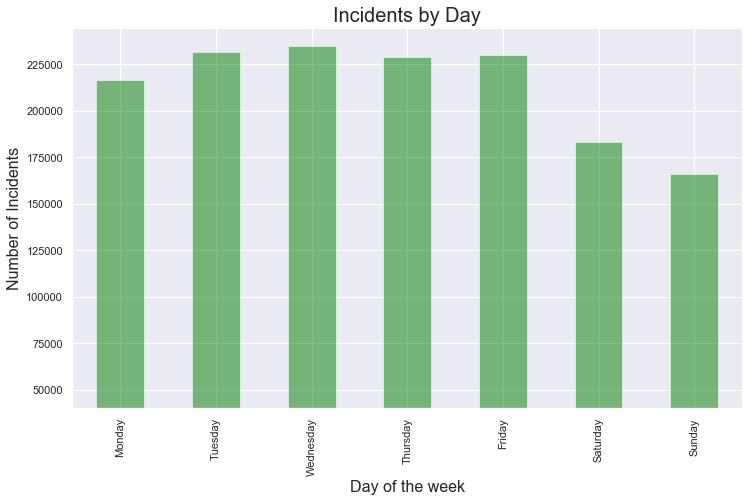

In [36]:
# Number of scooter per day of the week
day_incidents = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

In [28]:
# Number of scooter per day of the week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     26891
2     26611
3     26389
4     25215
5     25528
6     24931
7     25028
8     23557
9     24271
10    25022
11    23752
12    23372
13    23500
14    23885
15    24169
16    23854
17    24449
18    24730
19    24380
20    24579
21    24618
22    22624
23    24276
24    25093
25    24453
26    25378
27    23138
28    23425
29    23097
30    22911
31    22321
32    22500
33    21657
34    22027
35    21709
36    21083
37    22124
38    21958
39    22583
40    21541
41    21412
42    21296
43    22065
44    20530
45    21382
46    21156
47    23880
48    20539
49    23456
50    23717
51    22501
52    17147
Name: call_re, dtype: int64


In [38]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [49]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,26891
2,2,26611
3,3,26389
4,4,25215
5,5,25528
6,6,24931
7,7,25028
8,8,23557
9,9,24271
10,10,25022


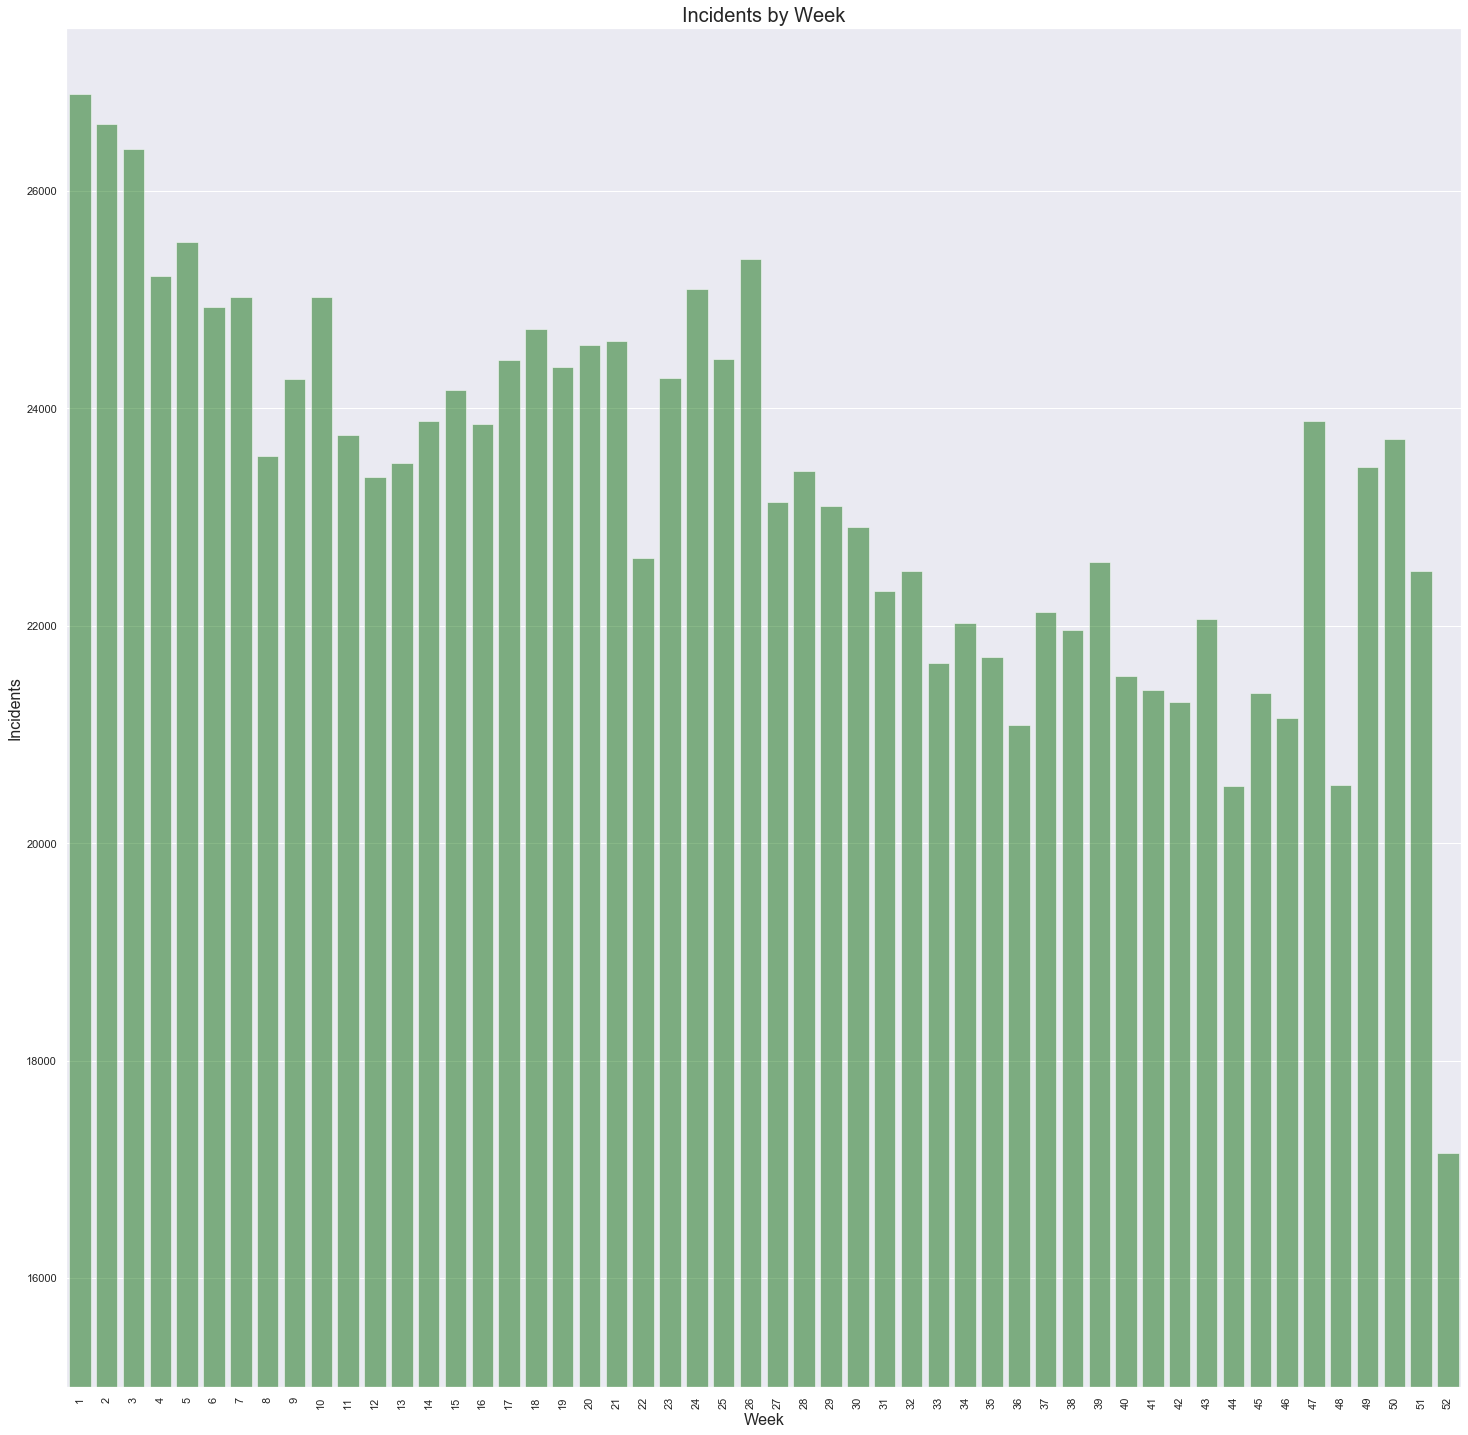

In [70]:
data = wk_ct

plt.ylim(15000, 27500)

g = sns.barplot(x = "Week",y = "Count", data = data, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(25,25)})
plt.title("Incidents by Week", fontsize = 20)
plt.xlabel("Week", fontsize = 16)
plt.ylabel("Incidents", fontsize = 16)
plt.show()

Text(0, 0.5, 'Number of Incidents')

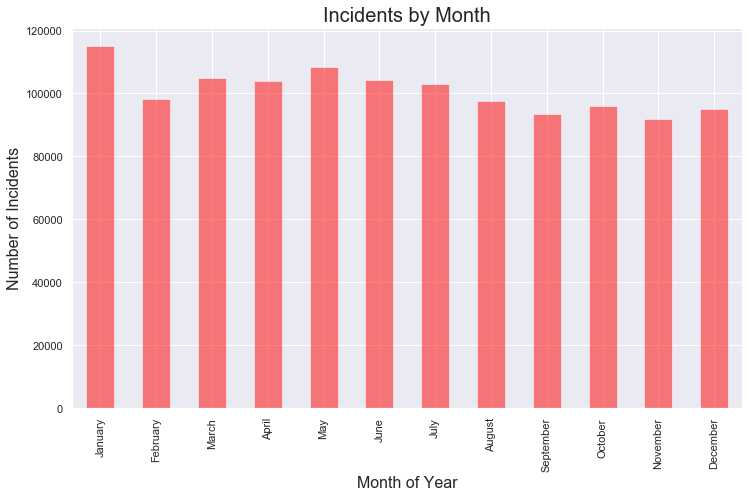

In [35]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Worst Day of Week = Wednesday 
\ Worst Week of Year = 1 
\ Worst Month of Year = January 

## Incidents Reported

In [87]:
inc_ct = df_13.tc_desc.value_counts()

In [88]:
inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [106]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

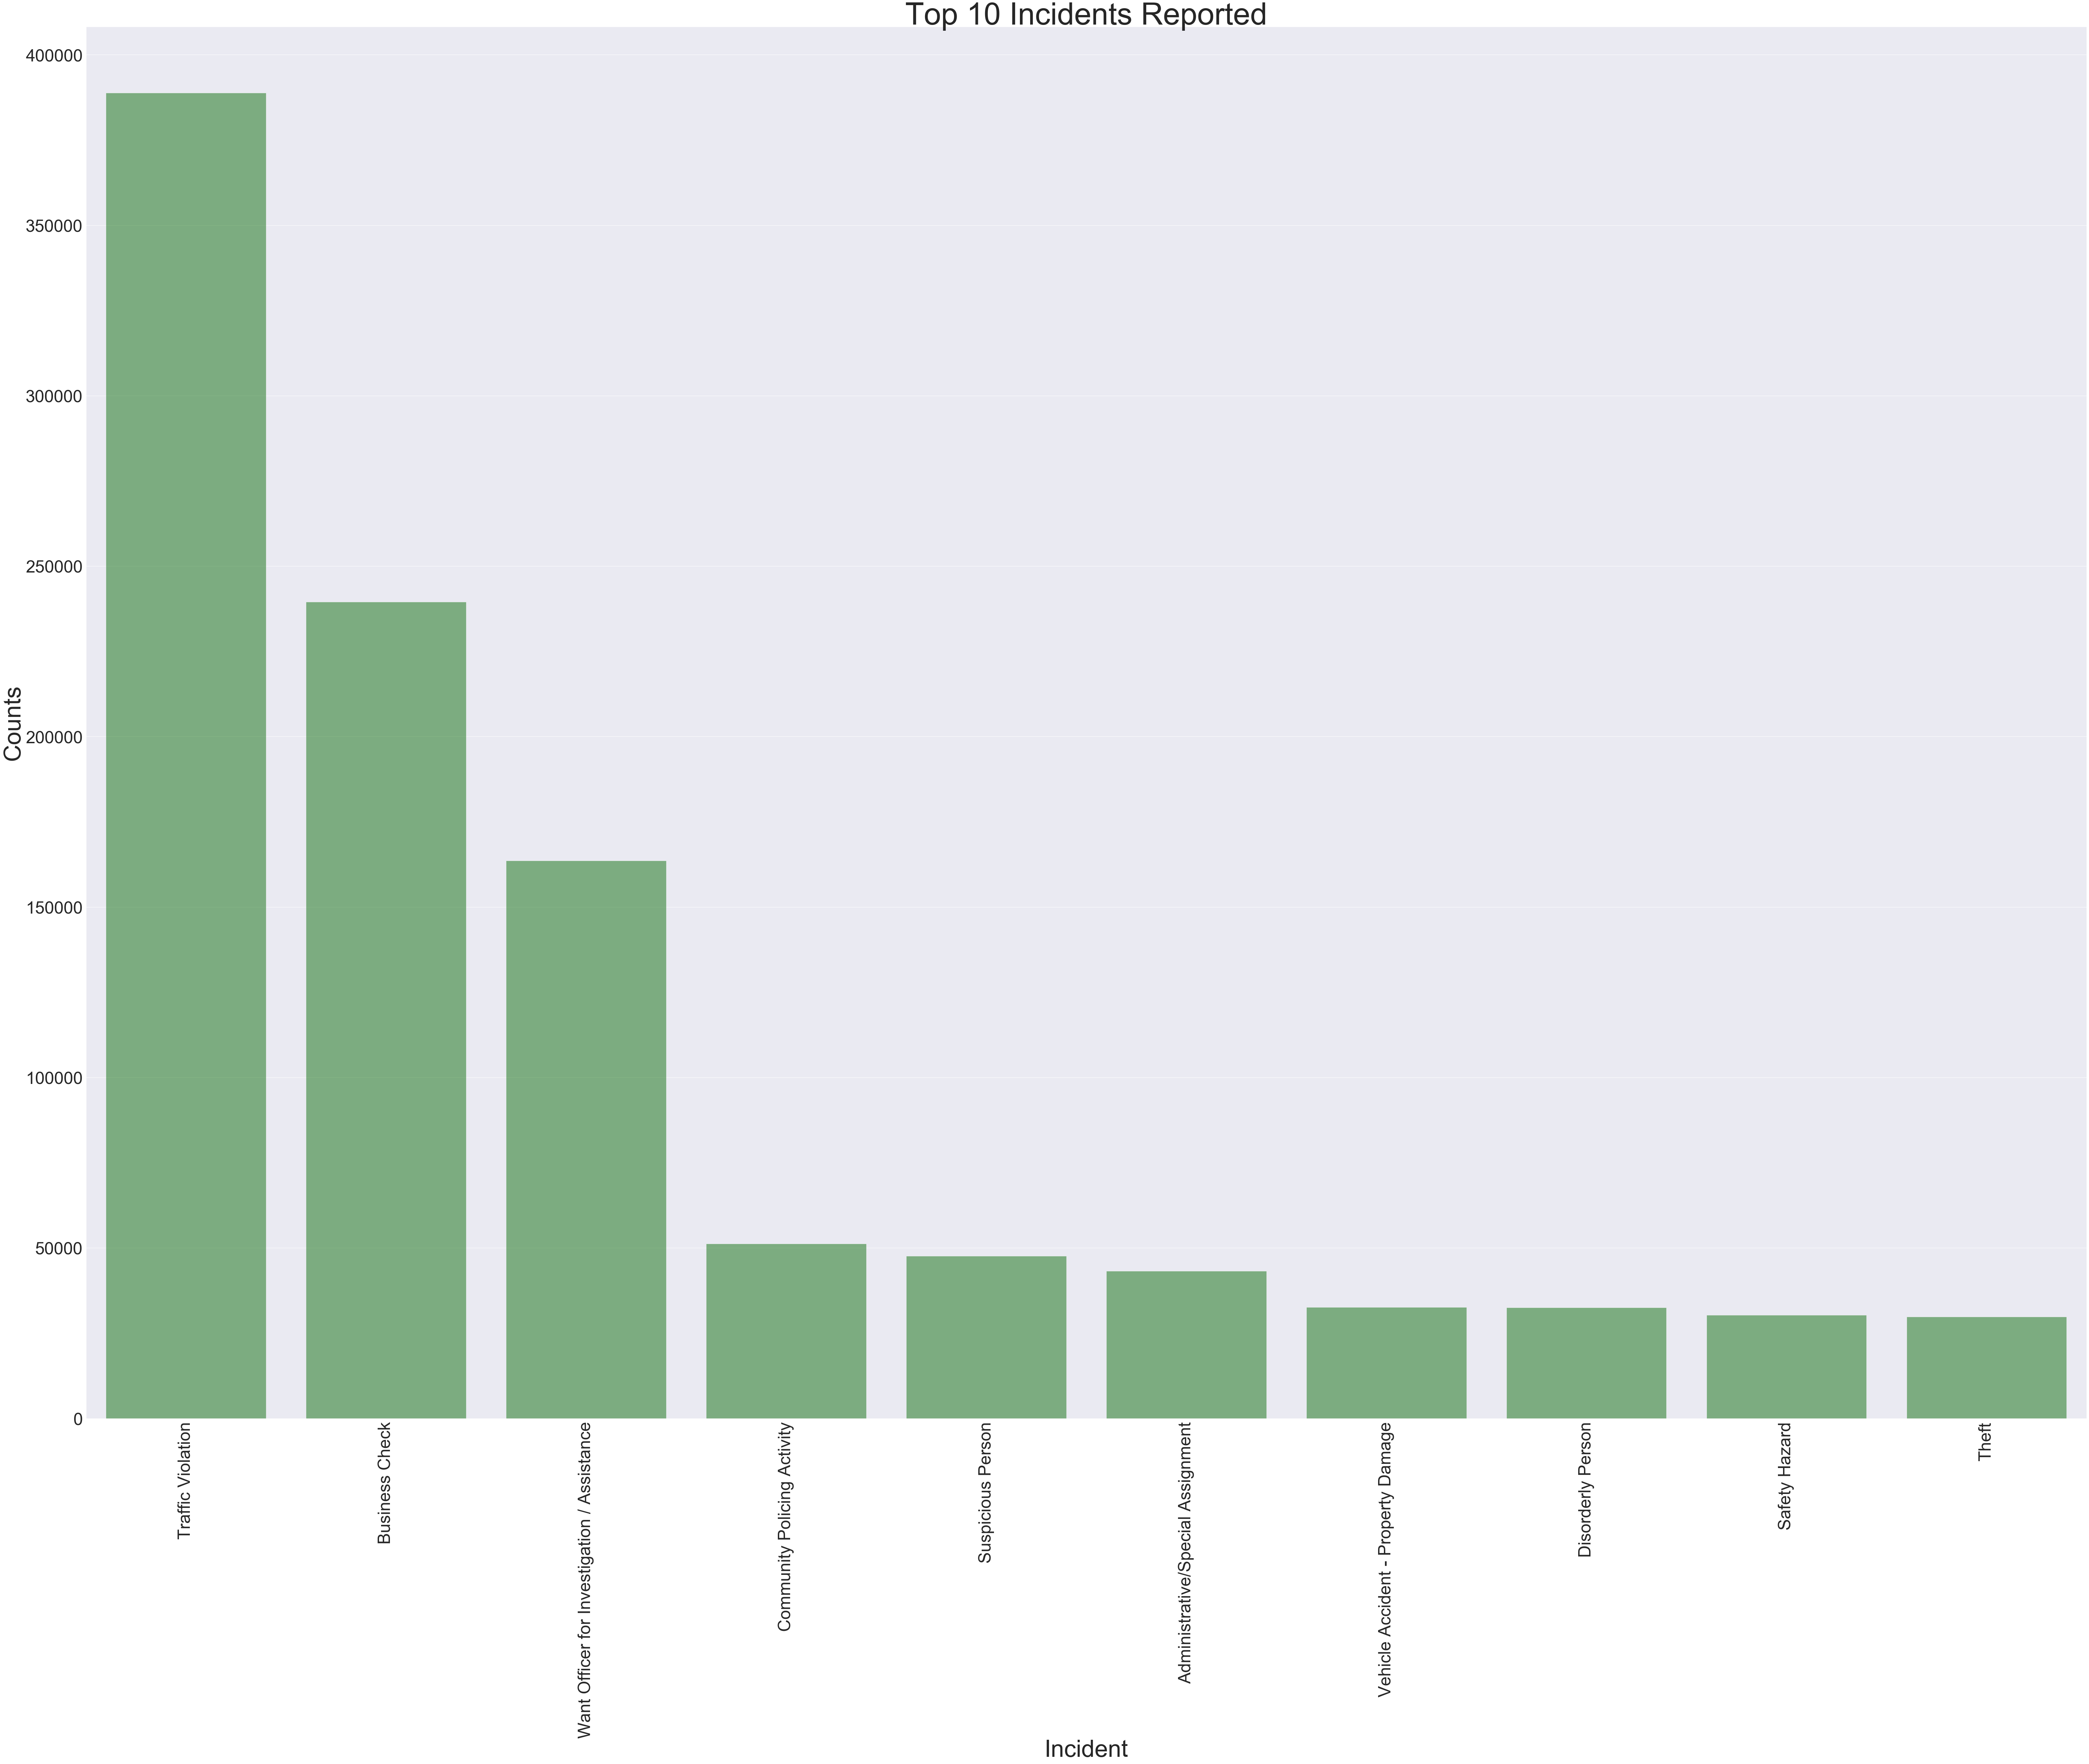

In [115]:
data = t25

g = sns.barplot(x = "Incident",y = "Count", data = data, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [116]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

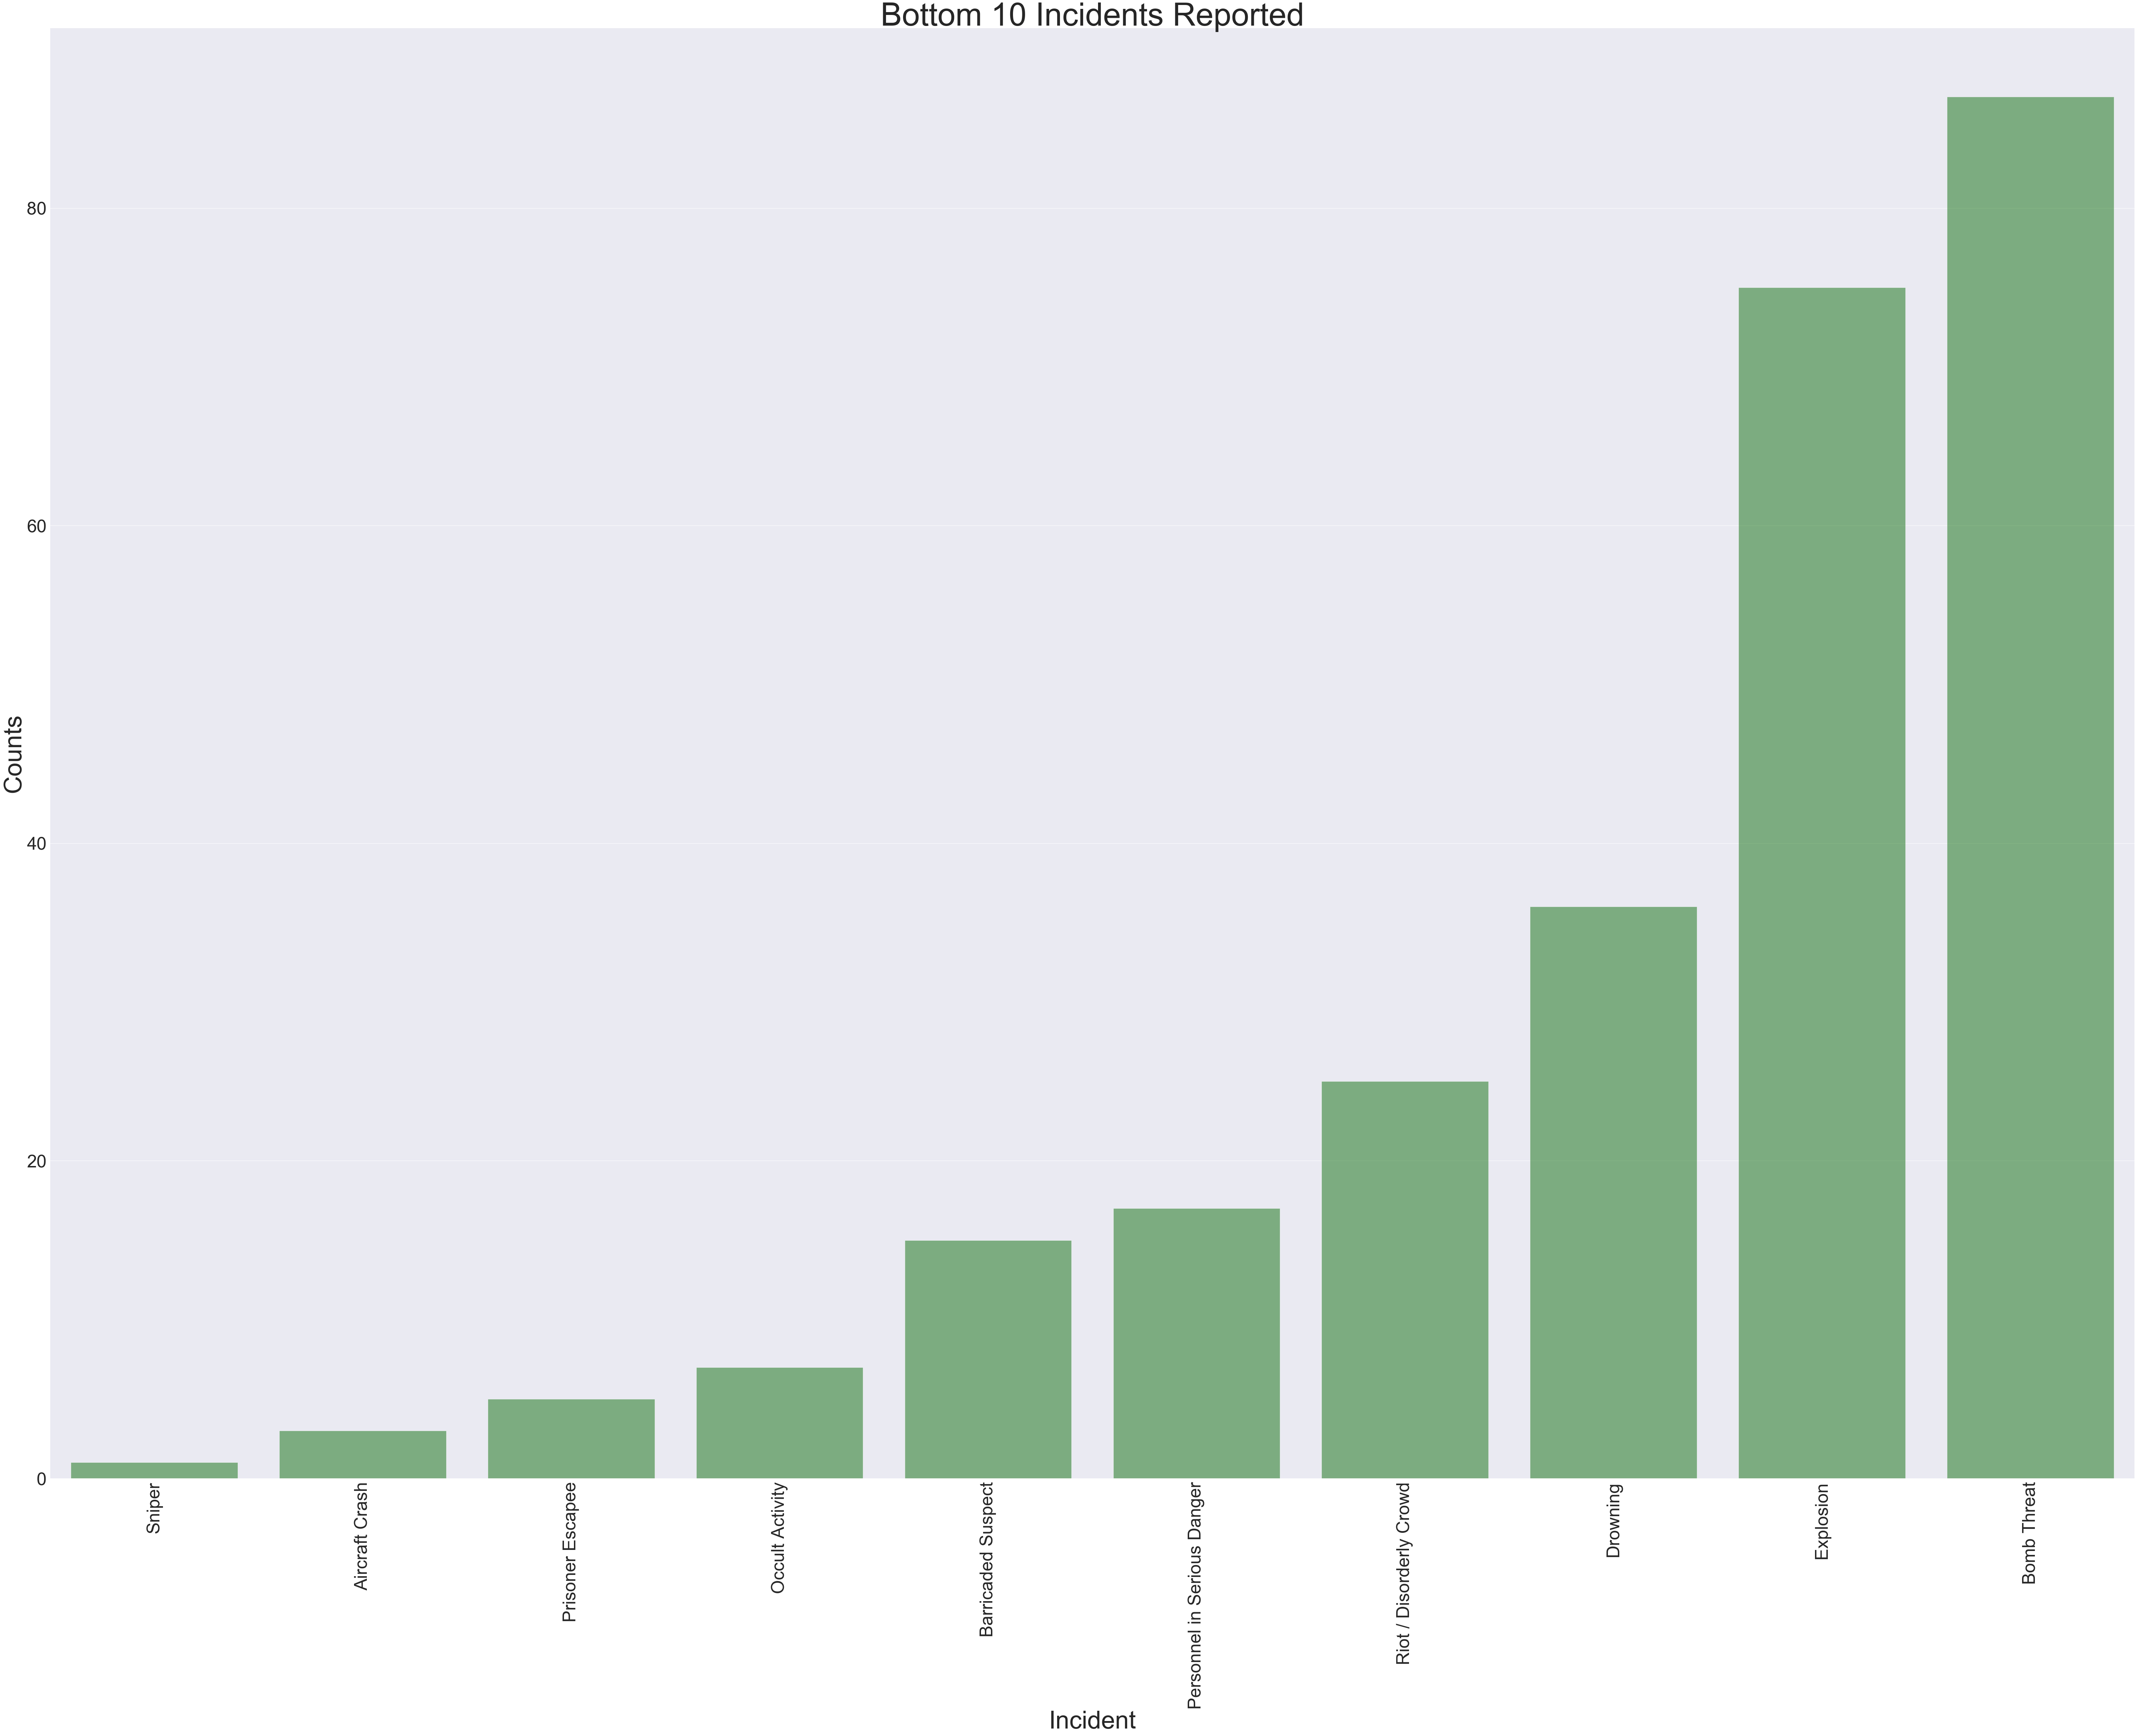

In [117]:
data = S25

g = sns.barplot(x = "Incident",y = "Count", data = data, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Mapping